In [32]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [33]:
# Loading the dataset 
human_activity_dataset = pd.read_csv('Human_activity_Dataset (1).csv')
print(human_activity_dataset.head()) # Shape of dataset

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

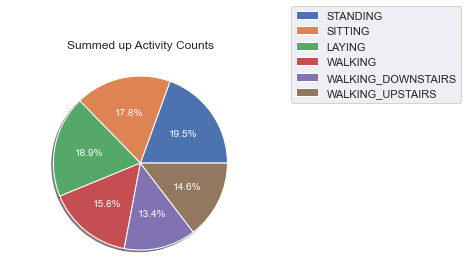

In [34]:
#Visualizing the data
human_activity_for_piechart = human_activity_dataset.groupby('Activity').sum()
plt.pie(np.array(human_activity_for_piechart['subject/Participant']), labels=human_activity_dataset['Activity'].unique(), colors=None, shadow=True,textprops=dict(color="w"),autopct='%1.1f%%')
plt.title('Summed up Activity Counts')
plt.legend(bbox_to_anchor=(2, 1), loc='center right', ncol=1)
plt.show()


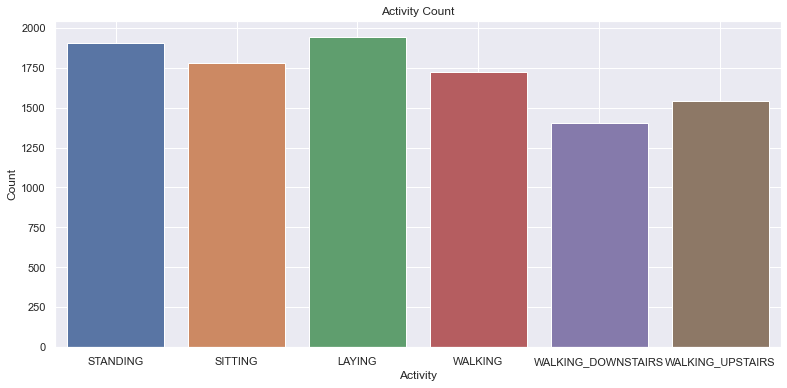

In [35]:
# activity count by plot

sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = human_activity_dataset)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

### From the above pie chart we can infer that majority are using the smart phone Laying.

In [36]:
# Checking if any of the row/column has null value
human_activity_dataset.isnull().values.any()
#Checking for numeric values
human_activity_dataset.dtypes

features = human_activity_dataset.loc[:, human_activity_dataset.columns != 'Activity']
features.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24


### Correlational Analysis on dataset

Text(0.5, 1.0, 'Correlational of Human Actitivity Detection')

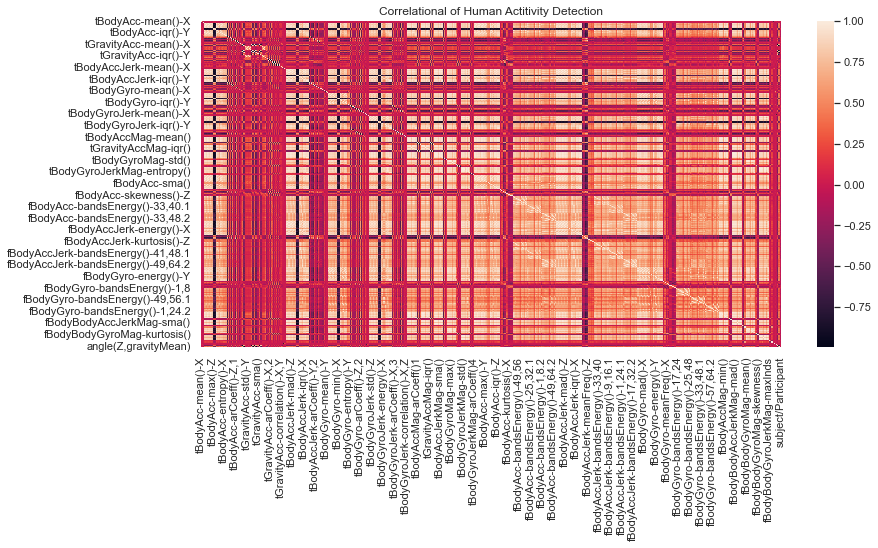

In [37]:
correlations = human_activity_dataset.corr()
sns.heatmap(correlations).set_title('Correlational of Human Actitivity Detection')

#### In the above code we can infer that, values are not normalized. So we will start doing a MinMaxScaler to normalize the data and range it between 0-1.

In [38]:
#MinMax Normalization - Importing the required libaries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Converting the values of Activity column to Numerics using LabelEncoder
encoder = LabelEncoder()
human_activity_dataset['Activity'] = encoder.fit_transform(human_activity_dataset.Activity.values)

#Case 1 Training data 80 %- Testing Data 20% Split
x_train1, x_test1,y_train1,y_test1 = train_test_split(human_activity_dataset,human_activity_dataset['Activity'],test_size=0.2,random_state=0)

#Case 1 Training data 10 %- Testing Data 90% Split
x_train2, x_test2,y_train2,y_test2 = train_test_split(human_activity_dataset,human_activity_dataset['Activity'],test_size=0.9,random_state=0)

scaler = MinMaxScaler().fit(x_train1)
scaler_2 = MinMaxScaler().fit(x_train2)

X_train_scaled = scaler.transform(x_train1)
X_test_scaled = scaler.transform(x_test1)

X_train_scaled_two = scaler.transform(x_train2)
X_test_scaled_two = scaler.transform(x_test2)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train1.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test1.columns)

X_train_scaled_two = pd.DataFrame(X_train_scaled_two, columns=x_train2.columns)
X_test_scaled_two = pd.DataFrame(X_test_scaled_two, columns=x_test2.columns)

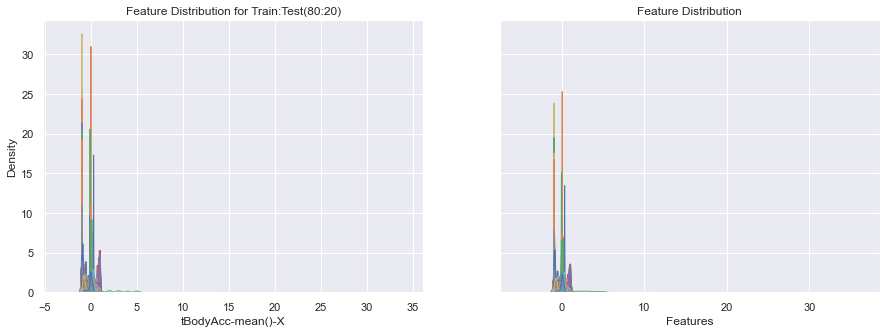

In [39]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

index = -1
pindex = -1
for i in x_train1.columns:
    index = index + 1
    sns.kdeplot(ax=axes[0], x=x_train1[i] , shade=True).set_title('Feature Distribution for Train:Test(80:20)')

for i in x_train2.columns:
    pindex = pindex + 1
    sns.kdeplot(ax=axes[1], x=x_train2[i] , shade=True).set_title('Feature Distribution for Train:Test(10:90)')

plt.xlabel('Features')
plt.title("Feature Distribution")
plt.show()


In [40]:
#Required libraries
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [41]:
X_train_scaled.head()
X_train_scaled_two.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant,Activity
0,0.653395,0.483400,0.429497,0.007007,0.020038,0.014529,0.006655,0.020896,0.014115,0.037093,...,0.041538,0.512975,0.818524,0.541532,0.480705,0.793347,0.689464,0.083680,0.275862,0.0
1,0.660719,0.485973,0.435592,0.276494,0.420879,0.369560,0.245651,0.422008,0.369065,0.476449,...,0.141133,0.131740,0.229337,0.109109,0.492083,0.161111,0.617985,0.597340,0.896552,0.6
2,0.558904,0.506561,0.433373,0.593198,0.695969,0.452297,0.555137,0.675030,0.452212,0.721607,...,0.158220,0.920810,0.117034,0.972533,0.440356,0.182164,0.654642,0.575477,0.689655,0.8
3,0.638782,0.491368,0.436549,0.002024,0.004344,0.003638,0.001666,0.004563,0.004088,0.031860,...,0.057344,0.575962,0.421850,0.256451,0.333844,0.165342,0.608724,0.608095,0.551724,0.4
4,0.639126,0.486220,0.422164,0.001487,0.009274,0.009441,0.001346,0.010194,0.008984,0.027612,...,0.345984,0.494051,0.491380,0.499718,0.461349,0.065929,0.589568,0.488190,0.862069,0.4


In [42]:
#Training Columns for Case 1
trainingColumns = x_train1.drop(columns=['Activity','subject/Participant'])
testingColumns = x_test1.drop(columns=['Activity','subject/Participant'])

#Training Columns for Case 2
trainingColumns_2 = x_train2.drop(columns=['Activity','subject/Participant'])
testingColumns_2 = x_test2.drop(columns=['Activity','subject/Participant'])

#PCA for Case 1
pca = PCA(0.95)
pca.fit(trainingColumns)
pca.fit(testingColumns)

#PCA for Case 2
pca2 = PCA(0.95)
pca2.fit(trainingColumns_2)
pca2.fit(testingColumns_2)

# Transforming the dataset of Case 1
train_pca = pca.transform(trainingColumns)
test_pca = pca.transform(testingColumns)

# Transforming the dataset of Case 2
train_pca_2 = pca.transform(trainingColumns_2)
test_pca_2 = pca.transform(testingColumns_2)

In [43]:
# logistic Regression - traning for Case 1
logModel = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,penalty='l2',C=0.01) 
logModel.fit(train_pca_2, x_train2['Activity'])

# logistic Regression - traning for Case 2
logModel_2 = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,penalty='l2',C=0.01) 
logModel_2.fit(train_pca_2, x_train2['Activity'])


LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000)

In [44]:
# Prediction for testing data for Case 1
y_pred = logModel.predict(test_pca)
print(y_pred)

# Prediction for testing data for Case 2
y_pred_2 = logModel_2.predict(test_pca_2)
print(y_pred_2)

#Prediction for training data for Case 1
y_pred_train = logModel.predict(train_pca)
print(y_pred_train)

#Prediction for training data for Case 2
y_pred_train_2 = logModel_2.predict(train_pca_2)
print(y_pred_train_2)

[1 4 0 ... 1 5 5]
[1 4 0 ... 3 0 4]
[4 1 3 ... 1 0 1]
[0 3 4 ... 1 0 1]


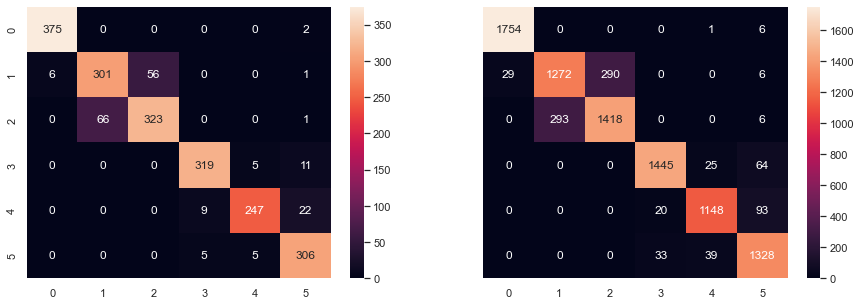

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#Confusion matrix for Case 1
cm = confusion_matrix(x_test1['Activity'], y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, fmt='d',ax=axes[0])  

#Confusion matrix for Case 2
cm_2 = confusion_matrix(x_test2['Activity'], y_pred_2)
df_cm_2 = pd.DataFrame(cm_2)
sns.heatmap(df_cm_2, annot=True, fmt='d',ax=axes[1])  

plt.show()


In [49]:
# Predicting the accuracy of training data for Case 1
print(classification_report(x_train1['Activity'], y_pred_train, labels=[1, 2, 3]))
print("Accuracy for Training Dataset in Case 1 is ",accuracy_score(x_train1['Activity'],y_pred_train)*100)

              precision    recall  f1-score   support

           1       0.81      0.79      0.80      1413
           2       0.83      0.83      0.83      1516
           3       0.97      0.94      0.95      1387

   micro avg       0.87      0.85      0.86      4316
   macro avg       0.87      0.85      0.86      4316
weighted avg       0.87      0.85      0.86      4316

Accuracy for Training Dataset in Case 1 is  90.22939677145284


In [48]:
# Predicting the accuracy of training data for Case 2
print(classification_report(x_train2['Activity'], y_pred_train_2, labels=[1, 2, 3]))
print("Accuracy for Training Dataset in Case 2 is ",accuracy_score(x_train2['Activity'],y_pred_train_2)*100)

              precision    recall  f1-score   support

           1       0.84      0.83      0.83       180
           2       0.85      0.85      0.85       189
           3       0.98      0.93      0.95       188

   micro avg       0.89      0.87      0.88       557
   macro avg       0.89      0.87      0.88       557
weighted avg       0.89      0.87      0.88       557

Accuracy for Training Dataset in Case 2 is  91.3508260447036


In [50]:
# Predicting the accuracy of testing data  for Case 1
print(classification_report(x_test1['Activity'], y_pred, labels=[1, 2, 3]))
print("Accuracy for Testing Dataset in Case 1 is",accuracy_score(x_test1['Activity'],y_pred)*100)

# Predicting the accuracy of testing data  for Case 2
print(classification_report(x_test2['Activity'], y_pred_2, labels=[1, 2, 3]))
print("Accuracy for Testing Dataset in Case 2 is",accuracy_score(x_test2['Activity'],y_pred_2)*100)

              precision    recall  f1-score   support

           1       0.82      0.83      0.82       364
           2       0.85      0.83      0.84       390
           3       0.96      0.95      0.96       335

   micro avg       0.87      0.87      0.87      1089
   macro avg       0.88      0.87      0.87      1089
weighted avg       0.87      0.87      0.87      1089

Accuracy for Testing Dataset in Case 1 is 90.8252427184466
              precision    recall  f1-score   support

           1       0.81      0.80      0.80      1597
           2       0.83      0.83      0.83      1717
           3       0.96      0.94      0.95      1534

   micro avg       0.87      0.85      0.86      4848
   macro avg       0.87      0.85      0.86      4848
weighted avg       0.87      0.85      0.86      4848

Accuracy for Testing Dataset in Case 2 is 90.23732470334413


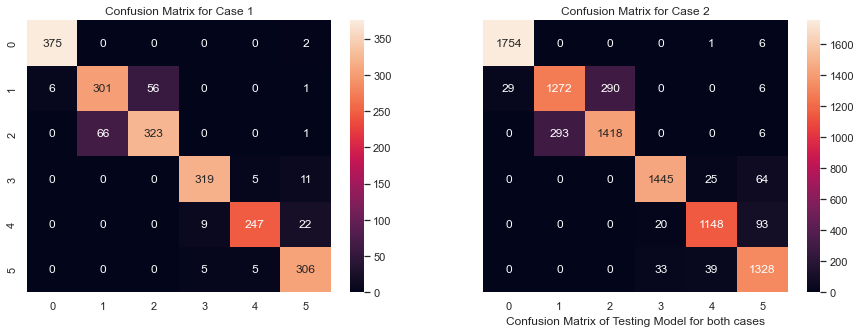

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#Confusion matrix for Testing Dataset Case 1
cm_test_1 = confusion_matrix(x_test1['Activity'], y_pred)
df_cm_test_1 = pd.DataFrame(cm_test_1)
sns.heatmap(df_cm_test_1, annot=True, fmt='d',ax=axes[0]).set_title('Confusion Matrix for Case 1')

#Confusion matrix for Case 2
cm_test_2 = confusion_matrix(x_test2['Activity'], y_pred_2)
df_cm_test_2 = pd.DataFrame(cm_test_2)
sns.heatmap(df_cm_test_2, annot=True, fmt='d',ax=axes[1]).set_title('Confusion Matrix for Case 2')

plt.xlabel('Confusion Matrix of Testing Model for both cases')
plt.show()